In [1]:
#KMeans clustering

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
os.environ["OMP_NUM_THREADS"] = '2'

In [2]:
C = pd.read_csv('Wholesale customers data.csv')

In [3]:
C.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
C.drop(['Region', 'Channel'], axis = 1, inplace = True)

In [5]:
C.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [7]:
C.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


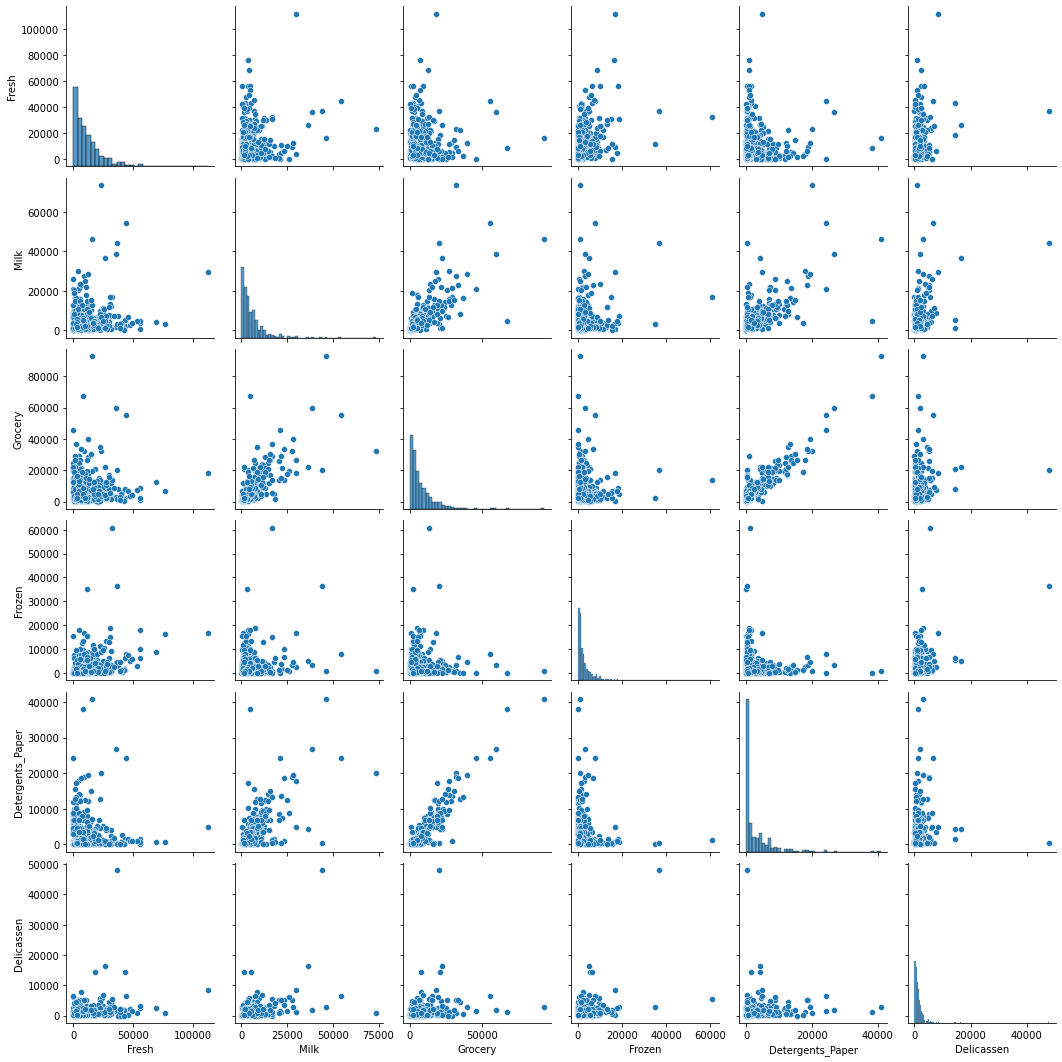

In [8]:
sns.pairplot(C.iloc[:,[0,1,2,3,4,5]])

<function matplotlib.pyplot.show(close=None, block=None)>

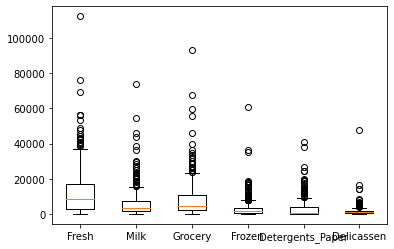

In [9]:
plt.boxplot(x=[C['Fresh'],C['Milk'],C['Grocery'],C['Frozen'],C['Detergents_Paper'],C['Delicassen']])
plt.xticks([1,2,3,4,5,6],['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'])
plt.show

In [10]:
from sklearn.preprocessing import RobustScaler
rc = RobustScaler()
X = rc.fit_transform(C)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

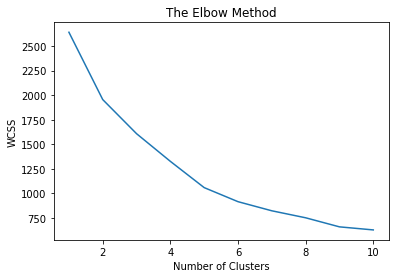

In [12]:
# Elbow method for optimal number of clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
       
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
# dimensionality reduction

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
C_reduced = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.44377284, 0.30248297])

In [14]:
sum(pca.explained_variance_ratio_)

0.746255804498144

In [15]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(C_reduced)

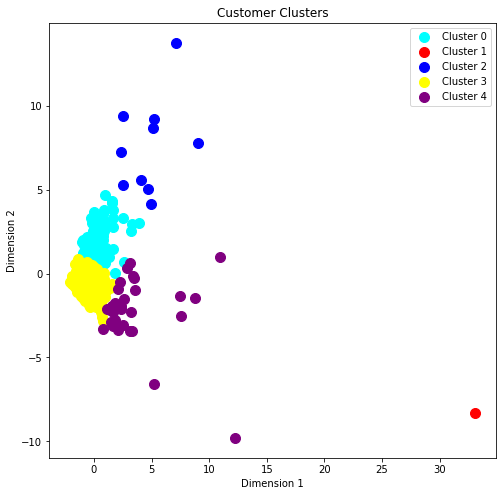

In [16]:
# Visualizing
plt.figure(figsize=(8,8))
plt.scatter(C_reduced[y_kmeans == 0, 0], C_reduced[y_kmeans == 0, 1], s = 100, c = 'Cyan', label = 'Cluster 0')
plt.scatter(C_reduced[y_kmeans == 1, 0], C_reduced[y_kmeans == 1, 1], s = 100, c = 'Red', label = 'Cluster 1')
plt.scatter(C_reduced[y_kmeans == 2, 0], C_reduced[y_kmeans == 2, 1], s = 100, c = 'Blue', label = 'Cluster 2')
plt.scatter(C_reduced[y_kmeans == 3, 0], C_reduced[y_kmeans == 3, 1], s = 100, c = 'Yellow', label = 'Cluster 3')
plt.scatter(C_reduced[y_kmeans == 4, 0], C_reduced[y_kmeans == 4, 1], s = 100, c = 'Purple', label = 'Cluster 4')
    
plt.title('Customer Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [17]:
C['clusters'] = y_kmeans

In [18]:
C.clusters.value_counts()

3    295
0    103
4     31
2     10
1      1
Name: clusters, dtype: int64

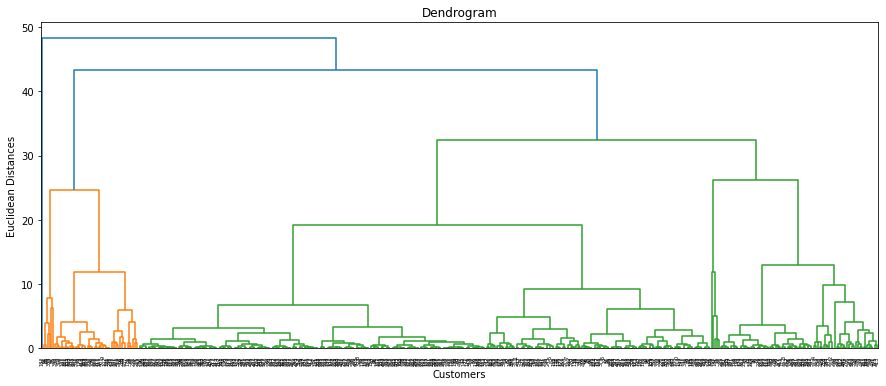

In [19]:
# Hierarchical Clustering
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
dendrogram = sch.dendrogram(sch.linkage(C_reduced, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [20]:
# Fitting Hierarchical Clustering to the Dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(C_reduced)

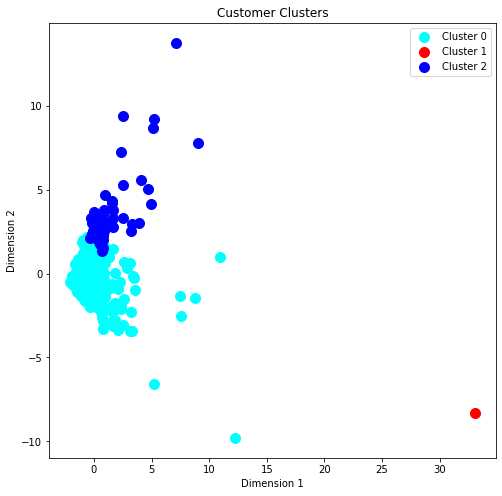

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(C_reduced[y_hc == 0, 0], C_reduced[y_hc == 0, 1], s = 100, c = 'Cyan', label = 'Cluster 0')
plt.scatter(C_reduced[y_hc == 1, 0], C_reduced[y_hc == 1, 1], s = 100, c = 'Red', label = 'Cluster 1')
plt.scatter(C_reduced[y_hc == 2, 0], C_reduced[y_hc == 2, 1], s = 100, c = 'Blue', label = 'Cluster 2')
plt.title('Customer Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [22]:
C['cluster'] = y_hc

In [23]:
C.cluster.value_counts()

0    389
2     50
1      1
Name: cluster, dtype: int64